In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import scipy
import random as rand
# from copy import deepcopy
# import numbers
# import logging

In [10]:
#Phi = lambda x: 
Phi = lambda x: 50*x**2*(x+.5)*(x-.5)
D = lambda x: 0.5
dt = 0.001
iteration_number = 1000
noise = [rand.gauss(0,np.sqrt(2)) for i in range(iteration_number)]
start_point = rand.uniform(-1,1)

def stoch_sim(Phi,D,noise,dt,start_point):
    negPhi = lambda x: -Phi(x)
    F = grad(negPhi)
    gradD = grad(D)
    n = len(noise)
    x_vals = [start_point]
    for i in range(int(n)):
        old_x = x_vals[-1]
        new_x = old_x + dt*(D(old_x)*F(old_x)+D(old_x)*gradD(old_x))+np.sqrt(D(old_x)*dt)*noise[i]
#         print(new_x)
        x_vals = np.append(x_vals,new_x)
    return x_vals
    
    

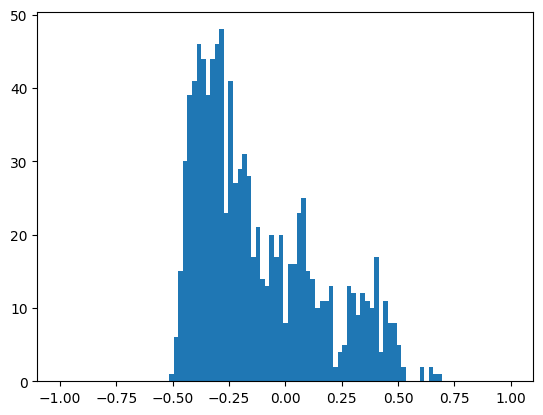

In [11]:

vals = stoch_sim(Phi,D,noise,dt,start_point)
plt.hist(vals,np.linspace(-1,1,num=100))
#plt.plot(np.linspace(-1,1,num=100),[np.exp(-Phi(2*x/99-1)) for x in range(100)])
plt.show() 

In [12]:
# g = lambda x : x**3
# gprime =  grad(g)
# invg = lambda y: ((y**2)**(1/2))**(1./3)*y/((y**2)**(1/2))
# Dy = lambda l:(gprime(invg(l)))**2.*D(invg(l))
# Dyprime = grad(Dy)
e = np.exp(1)
g = lambda x : (e**x - e**(-x))/(e**x + e**(-x)) 
gprime =  grad(g)
invg = lambda y: jnp.log((1+y)/(1-y))/2
Dy = lambda l:(gprime(invg(l)))**2.*D(invg(l))
Dyprime = grad(Dy)

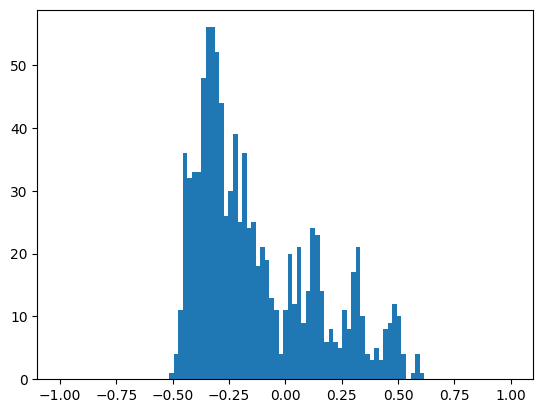

In [13]:
yvals = stoch_sim(Phi,Dy,noise,dt,g(start_point))
plt.hist(yvals,np.linspace(-1,1,num=100))
plt.show() 

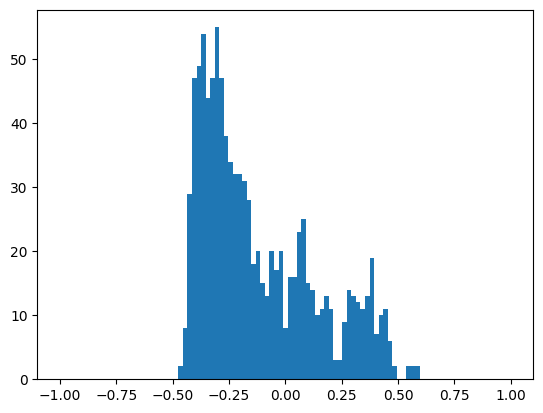

In [14]:
modded_vals = g(vals)
plt.hist(modded_vals,np.linspace(-1,1,num=100))
#plt.plot(np.linspace(-1,1,num=100),[np.exp(-Phi(2*x/99-1)) for x in range(100)])
plt.show() 

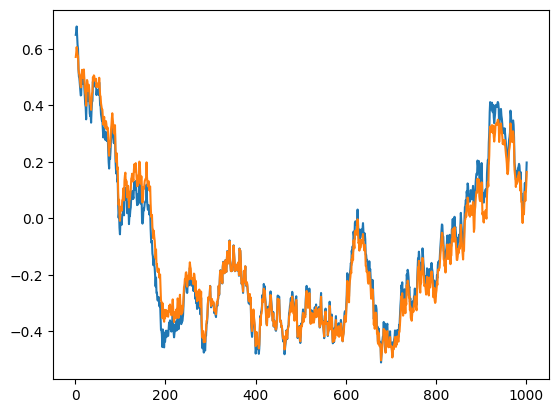

In [15]:
plt.plot(np.linspace(1,len(vals),num=len(vals)),(vals))
plt.plot(np.linspace(1,len(vals),num=len(vals)),(yvals))

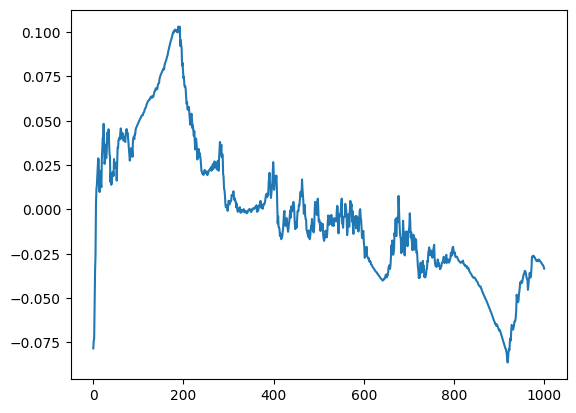

In [16]:
plt.plot(yvals-(vals))
